In [2]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.svm import SVC

In [3]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [5]:
X = fish[fish.columns[-5:]]
y = fish['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [6]:
X

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,12.2,12.2,13.4,2.0904,1.3936
155,13.4,12.4,13.5,2.4300,1.2690
156,12.2,13.0,13.8,2.2770,1.2558
157,19.7,14.3,15.2,2.8728,2.0672


In [7]:
y

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
#Standard Scaling
std = StandardScaler()
std.fit(X_train)
X_train_std= std.transform(X_train)
X_test_std= std.transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train_std, y_train)

print(kn.score(X_train_std, y_train))
print(kn.score(X_test_std, y_test))


0.8828828828828829
0.7916666666666666


C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(accuracy_score(y_test, pred_svm))

0.4375


In [11]:
cm_svm = confusion_matrix(y_test, pred_svm)

print(cm_svm)

[[ 8  0  5  0  0  0  0]
 [ 0  0  4  0  0  0  0]
 [ 3  0 12  0  0  0  0]
 [ 4  0  1  1  0  0  0]
 [ 0  0  5  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 1  0  1  0  0  0  0]]


In [12]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print (accuracy_score(y_test, pred_dt))

0.75


In [13]:
## confusion metrix
cm_dt = confusion_matrix(y_test, pred_dt)

print(cm_dt)

[[12  1  0  0  0  0  0]
 [ 0  1  0  0  3  0  0]
 [ 0  0 14  0  1  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  4  0  0  0  1]
 [ 0  0  0  0  0  3  0]
 [ 0  0  2  0  0  0  0]]


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)

print(accuracy_score(y_test,pred_rf))

0.75


In [18]:
cm_rf = confusion_matrix(y_test, pred_rf)

print(cm_dt)

[[12  1  0  0  0  0  0]
 [ 0  1  0  0  3  0  0]
 [ 0  0 14  0  1  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  4  0  0  0  1]
 [ 0  0  0  0  0  3  0]
 [ 0  0  2  0  0  0  0]]


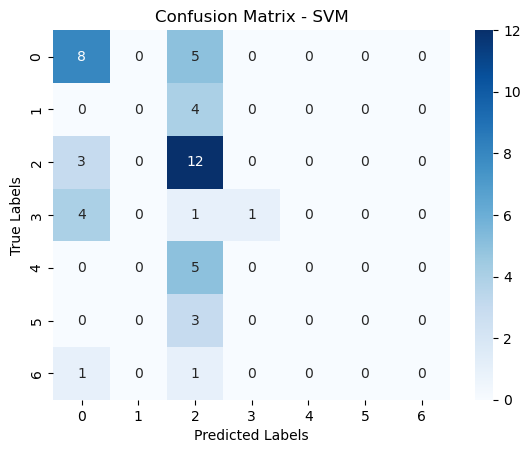

In [19]:
sns.heatmap(cm_svm, annot=True, cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print (accuracy_score(y_test, pred_lr))

0.8125


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
cm_lr = confusion_matrix(y_test, pred_lr)

print(cm_lr)

[[13  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0 13  0  2  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  1  0  4  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  2  0  0  0  0]]


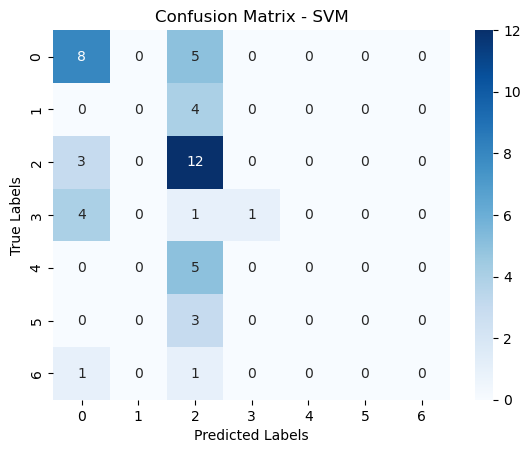

In [20]:
sns.heatmap(cm_svm, annot=True, cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()